### Manish Tripathi
### PGID: 12010079

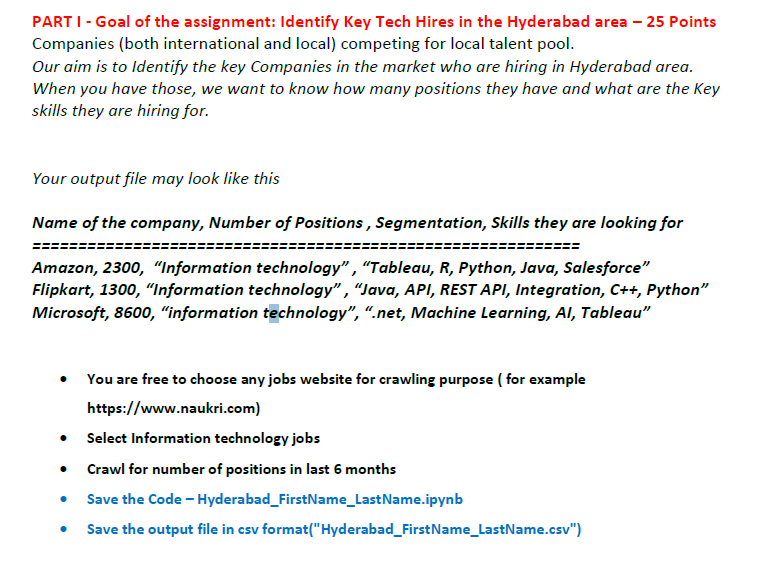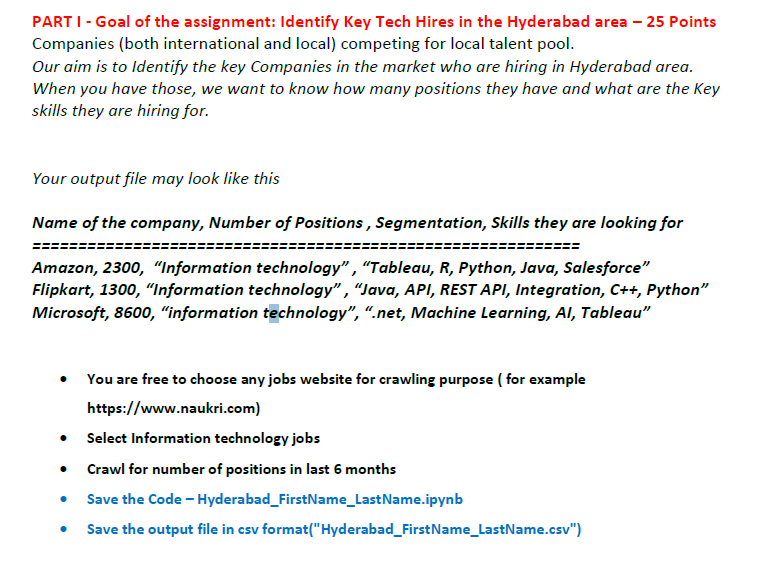

#### The Objective of the Assignment is to identify key Tech Hires in Hyderabad Area and for that to collect data through scrapping one of the Jobs Websites. The website used for the assignment is https://www.naukri.com/

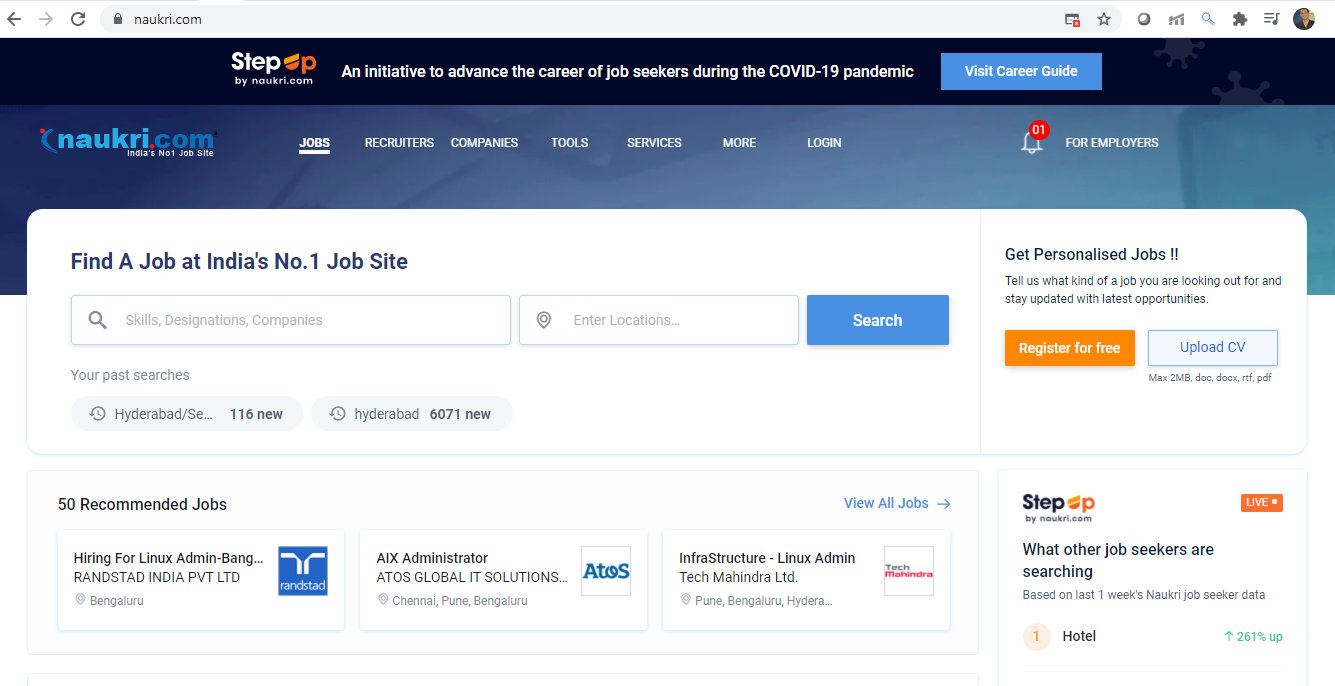

#### The final Output Achieved looks as below:

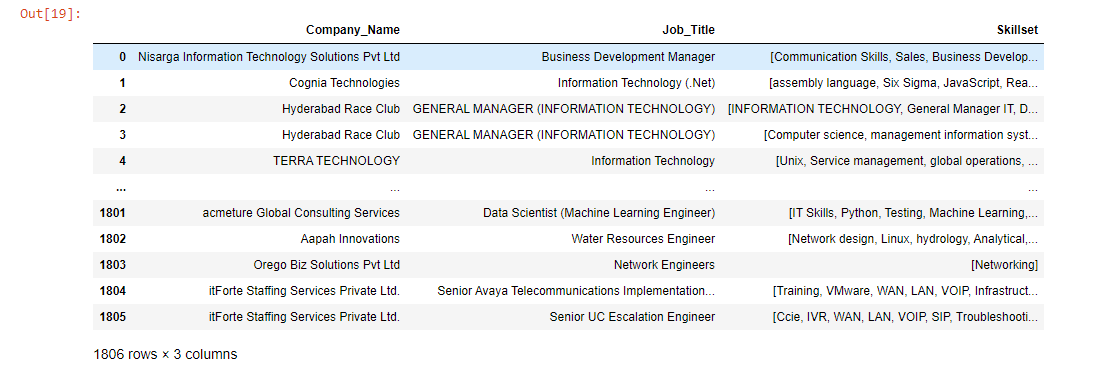

### Imported Various Packages required to scrap the website:

In [1]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import requests 
import pandas as pd
import numpy as np
import lxml
import os

#### Defined the location of Chrome webdriver and the created a Chrome webdriver Object using "webdriver.Chrome()"

In [2]:
driver = webdriver.Chrome(r"C:\Users\Manish_Skillgigs\Desktop\Naukri Project\chromedriver.exe")

#### Defined the base URL which searches for Information Technoligy Jobs in Hyderabad/Secundrabad Area"

In [3]:
url = "https://www.naukri.com/information-technology-jobs-in-hyderabad-secunderabad"

#### Defined the number of pages that we would like to Scrap, Also the same will be used to cook the web pages for pagination

In [4]:
page_count = 100

#### Creating a list of Web page links after styuding the pattern in Naukri how pages are numbered for subsequent pages (Pagination)

In [5]:
page_links = [url + "-" + str(page) for page in range (1, page_count+1) ]

In [6]:
Company_Name = []  # Creating an empty List that will be used to store Company Names
Skillset = []      # Creating an empty List that will store list of Skills defined for particular job role by respective companies
Job_Title = []     # Creating an empty List that will contain the Job Role/Title defined by the companies

for page in page_links:  # By looping though for loop here we will go through various page links created 
                         # above to scrap data from that page
    
    driver.get(page)      # For each page we will use the driver object to open that page in an automated manner
    
    time.sleep(5)
    all_jobs = driver.find_elements_by_class_name("jobTuple")  # Using the driver Object to find the elements 
                                                               # by class name to find that class that contains all the attribute
                                                               # of a particular listing. This will give us a list 
    
    for job in all_jobs:   # For each listing we will reiterate through the list above and get the HTML code for each listing
        
        
        results_html = job.get_attribute("innerHTML") 
        soup = BeautifulSoup(results_html,"lxml") # Using BeautifulSoup we will form a soup Object using the lxml parser
        
        try:
            Company = soup.find("a", class_ = 'subTitle ellipsis fleft').text.strip().lower()  # For each Soup Object we using the find method
                                                                                               # we will find the DOM tag "a" and access the
                                                                                               # "subTitle ellipsis fleft" class as that Contains
                                                                                               # the company name which posted the Job
        
        except:                                   # We are using the try and except block her for exception Handling
            Company = ""
        
        try:
            title = soup.find("a", class_ = 'title fw500 ellipsis').text.strip().lower()   # For each Soup Object we using the find method
                                                                                            # we will find the DOM tag "a" and access the
                                                                                            # "title fw500 ellipsis" class as that Contains
                                                                                            # the Job title
            
    
        except:
            title = ""
        
        
        try:
            skills = []  # as the there are multiple skills required for each Job we are initiating an empty lsi to create a list of all such skills
            for skill in soup.find_all("li", class_= "fleft fs12 grey-text lh16 dot"):
                skills.append(skill.text.strip().lower())
        except:
            skills.append("")
            
        Company_Name.append(Company)
        Skillset.append(skills)
        Job_Title.append(title)
    
        
    time.sleep(0.5)

In [7]:
# Once we have Created a list for each Company_Name,Job_Title and Skillset we are creating a dataframe using Pandas


df = pd.DataFrame(Company_Name, columns = ["Company_Name"])
df["Job_Title"] = pd.Series(Job_Title)
df["Skillset"]= pd.Series(Skillset)

df

,Company_Name,Job_Title,Skillset
0,l&g technologies private limited,senior information technology recruiter,"[information technology, advertising, written ..."
1,srinivasa farms private limited,senior manager- information technology,"[enterprise architecture, erp system, program ..."
2,icici bank,information technology analyst,"[software development, data governance, full s..."
3,heritage foods,regional incharge- information technology (ri-...,"[data management, information technology, netw..."
4,4onlinemedia,freshers / bba / be- information technology,"[troubleshooting, it management, it infrastruc..."
...,...,...,...
1995,spinebiz services private limited,java software engineer,"[dwr, jsp, java, javascript, hibernate, oracle..."
1996,verisk analytics,software engineer ii - integration (.net),"[c#, .net, grpc, it skills, java, software dev..."
1997,verisk analytics,lead software engineer (c++),"[c++, data structures, stl, object oriented de..."
1998,microsoft,principal software engineer,"[computer science, engineering management, dat..."


In [8]:
d1 = df["Company_Name"].value_counts()

In [9]:
d2 = df.groupby("Company_Name")['Skillset'].apply(list).apply(np.ravel).apply(np.array).apply(np.unique)

C:\Users\Manish_Skillgigs\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


In [10]:
df = d2.sort_index().to_frame().join(d1.sort_index())

In [11]:
df.columns = ["Skills they are looking for" , "Number of positions"]

In [12]:
df.reset_index(inplace = True)

In [13]:
df.head()

,Company_Name,Skills they are looking for,Number of positions
0,10xbiz,"[coding, erp, html, javascript, jquery, json, ...",1
1,24-7 intouch,"[bpo, issue resolution, it skills, management,...",1
2,2a edtech,"[btech, cse, documentation, english writing, i...",1
3,4onlinemedia,"[[communication, analytical, it infrastructure...",3
4,a l b enterprises (india) private limited,"[agile, ajax, bootstrap, coding, debugging, de...",2


In [14]:
df.to_csv("Hyderabad_Information_Technology_Jobs.csv", index = False)
print("The file is stored at:", os.getcwd())

The file is stored at: C:\Users\Manish_Skillgigs\Desktop\Naukri Project


In [16]:
df.sort_values("Number of positions", ascending = False)

,Company_Name,Skills they are looking for,Number of positions
311,optum,"[[.net, api, web services, c#, tfs, ms sql, jq...",141
270,microsoft,"[.net, account management, active directory, a...",113
154,factset systems india pvt ltd,"[.net, active directory, agile, agile methodol...",69
129,dun & bradstreet,"[[algorithms, c, data structures, java, c++, s...",60
153,"f5 networks, inc","[agile, agile methodology, analytical, apache,...",39
...,...,...,...
207,index infotech,"[c# net, crystal, data structures, dot net fra...",1
206,ikeva venture and knowledge advisory services ...,"[ccna, cisco, it networking]",1
204,igt india private limited,"[apache http server, css, git, html, jenkins, ...",1
203,iflex (recruitingpartner),"[j2ee, software engineer associate, spring, te...",1
